<a href="https://colab.research.google.com/github/kiannakazemi/Football-Analysis-1/blob/main/FootballAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries.

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from google.colab import files
import io 
import pandas as pd
import copy

Read csv file.

In [ ]:
data = files.upload()
df = pd.read_csv(io.StringIO(data['results.csv'].decode('utf-8')))

Saving results.csv to results.csv


                                       
The chosen team is "Poland".
Using a for loop that runs through the dataframe that contains the games played by Poland, we can calculate the number of wins, losses and draws.


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year

S = "Poland"
winN = 0
loseN = 0
drawN = 0
tournament = copy.deepcopy(df[(df['tournament'] == "FIFA World Cup")])
new_df = copy.deepcopy(tournament[(tournament['home_team'] == S) | (tournament['away_team'] == S)])

for i, row in new_df.iterrows():
  if row['home_team'] == S:
    if row['home_score'] > row['away_score']:
      winN = winN+1
    elif row['home_score'] < row['away_score']:
      loseN = loseN+1
    else:
      drawN = drawN+1
  if row['away_team'] == S:
    if row['home_score'] < row['away_score']:
      winN= winN+1
    elif row['home_score'] > row['away_score']:
      loseN = loseN+1
    else:
      drawN = drawN+1
print(S, 'won', winN, 'times.')
print(S, 'lost', loseN, 'times.')
print("The number of draws for", S ,"is:",drawN)

Poland won 16 times.
Poland lost 13 times.
The number of draws for Poland is: 5


The 'scoreAVG' function calculates the average of the goals scored, and the 'concedeAVG' function calculates the average of the goals conceded. 

In [ ]:
def scoreAVG(team):
  homeScore = tournament[tournament['home_team'] == team]
  awayScore = tournament[tournament['away_team'] == team]
  homeGoal = homeScore.home_score
  awayGoal = awayScore.away_score
  goalScored = homeGoal.append(awayGoal)
  return goalScored.mean()

average_goal_scored = scoreAVG(S)
print("The average of the goals scored by", S, "is:", average_goal_scored)

def concedeAVG(team):
  homeConcede = tournament[tournament['home_team'] == team]
  awayConcede = tournament[tournament['away_team'] == team]
  homeGoal = homeConcede.away_score
  awayGoal = awayConcede.home_score
  goalConceded = homeGoal.append(awayGoal)
  return goalConceded.mean()
  
average_goal_conceded = concedeAVG(S)
print("The average of the goals conceded by", S, "is:", average_goal_conceded)

The average of the goals scored by Poland is: 1.3529411764705883
The average of the goals conceded by Poland is: 1.3235294117647058


To graph the progress of the games played by Poland in terms of goals scored and conceded, first I added a 'Year' column to new_df, then I created new_dff with three columns 'Scored', 'Conceded', and 'Year'.
The 'Scored' column contains the sum of the goals scored by Poland in each year, and the 'Conceded' column contains the sum of the goals conceded in each year.

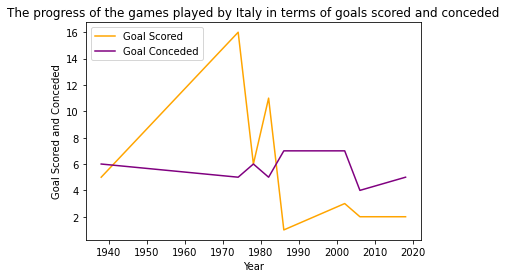

In [ ]:
new_df['year'] = pd.DatetimeIndex(new_df['date']).year
year = new_df['year'].value_counts().sort_index()
unique_year = pd.unique(new_df['year'])
new_dff = pd.DataFrame(columns=['Scored', 'Conceded', 'Year'])
tourn = copy.deepcopy(new_df[(new_df['tournament'] == "FIFA World Cup")])

def sum_goal_scored(t, y):
  homeScore = tourn.loc[(tourn['home_team'] == t) & (tourn['year'] == y)]
  awayScore = tourn.loc[(tourn['away_team'] == t) & (tourn['year'] == y)]
  homeGoal = homeScore.home_score
  awayGoal = awayScore.away_score
  goalScored = homeGoal.append(awayGoal)
  return goalScored.sum()

def sum_goal_conceded(t, y):
  homeConcede = tourn.loc[(tourn['home_team'] == t) & (tourn['year'] == y)]
  awayConcede = tourn.loc[(tourn['away_team'] == t) & (tourn['year'] == y)]
  homeGoal = homeConcede.away_score
  awayGoal = awayConcede.home_score
  goalConceded = homeGoal.append(awayGoal)
  return goalConceded.sum()

for year in unique_year:
  goalScoredT = sum_goal_scored(S, year) 
  goalConcededT = sum_goal_conceded(S, year)
  new_dff = new_dff.append({'Scored':goalScoredT, 'Conceded':goalConcededT, 'Year':year}, ignore_index=True)

plt.title('The progress of the games played by Italy in terms of goals scored and conceded')
plt.plot(new_dff['Year'], new_dff['Scored'], color = 'orange')
plt.plot(new_dff['Year'], new_dff['Conceded'], color = 'purple')
plt.xlabel('Year')
plt.ylabel('Goal Scored and Conceded')
plt.legend(['Goal Scored', 'Goal Conceded'], loc = 'upper left')
plt.show()

For selecting the teams with better results than Poland, I created a new dataframe new_dfff with three columns 'Team', 'AVG Scored' and 'AVG Conceded'. The 'Team' column contains the unique concatenation of home and away teams, the 'AVG Scored' column contains the average of goals scored by each country, and the 'AVG Conceded' contains the average of goals conceded by each country. 
Then using a for loop I inserted the teams better than Poland in a list.

In [ ]:
aux1 = pd.unique(tournament['home_team'])
aux2 = pd.unique(tournament['away_team'])
team =pd.unique(np.concatenate((aux1, aux2)))
new_dfff = pd.DataFrame(columns=['Team', 'AVG Scored', 'AVG Conceded'])

for country in team:
  ags = scoreAVG(country)
  agc = concedeAVG (country)
  new_dfff = new_dfff.append({'Team':country, 'AVG Scored': ags, 'AVG Conceded': agc}, ignore_index=True)

teams = []
for index, row in new_dfff.iterrows():
  if((row['AVG Scored'] > scoreAVG(S)) & (row['AVG Conceded'] < concedeAVG (S))):
    teams.append(row['Team'])
teams.sort()
print ("The teams with better results than", S, "are:")
print(*teams, sep = ', ')

The teams with better results than Poland are:
Argentina, Brazil, Croatia, Denmark, France, Germany, Italy, Netherlands, Portugal, Russia, Senegal, Spain, Uruguay, Yugoslavia


To find Poland's maximum number of consecutive wins, I added the 'Streak' column, then using a for loop, I incremented the count variable by 1 whenever a consecutive win was found.
In the end, using the max function we can find the maximum number of consecutive wins.

In [ ]:
df['Streak'] = 0
count = 0
for index, row in new_df.iterrows():
    if row['home_team'] == S:
      if row['home_score'] > row['away_score']:
        count += 1
        new_df.loc[index,'streak'] = count
      else:
        count = 0
        new_df.loc[index,'streak'] = count
    
    if row['away_team'] == S:
      if row['home_score'] < row['away_score']:
        count += 1
        new_df.loc[index,'streak'] = count
      else:
        count = 0
        new_df.loc[index,'streak'] = count

consecutive_wins = int(new_df.streak.max())
print("The maximum number of consecutive wins of", S, "is:", consecutive_wins)

The maximum number of consecutive wins of Poland is: 5
